In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode()
sns.set_style('darkgrid')
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
plt.rc('figure',figsize=(18,9))


In [2]:
import pandas as pd 
import seaborn as sns 
import numpy as np 

churn = pd.read_csv('BankChurners.csv')

churn = churn.iloc[:, :-2]                    
churn.head(5)

# Show all the descriptive statistics for each column
desc_stats = churn.describe(include='all')
print(desc_stats)


           CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
count   1.012700e+04              10127  10127.000000  10127     10127.000000   
unique           NaN                  2           NaN      2              NaN   
top              NaN  Existing Customer           NaN      F              NaN   
freq             NaN               8500           NaN   5358              NaN   
mean    7.391776e+08                NaN     46.325960    NaN         2.346203   
std     3.690378e+07                NaN      8.016814    NaN         1.298908   
min     7.080821e+08                NaN     26.000000    NaN         0.000000   
25%     7.130368e+08                NaN     41.000000    NaN         1.000000   
50%     7.179264e+08                NaN     46.000000    NaN         2.000000   
75%     7.731435e+08                NaN     52.000000    NaN         3.000000   
max     8.283431e+08                NaN     73.000000    NaN         5.000000   

       Education_Level Mari

In [3]:
pd.crosstab(churn['Gender'], churn['Attrition_Flag'], margins = True, margins_name = "Total")

Attrition_Flag  Attrited Customer  Existing Customer  Total
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
Total                        1627               8500  10127

In [4]:
print(f"Data Types:\n{churn.dtypes}")
print(f"\nRows and Columns:\n{churn.shape}")
print(f"\nColumn Names:\n{churn.columns}")
print(f"\nNull Values %:\n{churn.apply(lambda x: sum(x.isnull()) / len(churn))}")
print(f"\nUnknown Values %:\n{churn.apply(lambda x: sum(x=='Unknown') / len(churn))}")

Data Types:
CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Rows and Columns:
(10127, 21)

Column Names:
Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'M

In [5]:
# Show the data types of each column
data_types = churn.dtypes
print(data_types)

pd.crosstab(churn['Gender'], churn['Attrition_Flag'], margins = True, margins_name = "Total")


CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object


Attrition_Flag  Attrited Customer  Existing Customer  Total
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
Total                        1627               8500  10127

Attrition_Flag  Attrited Customer  Existing Customer  % columns
Gender                                                         
F                        0.571604           0.520941   0.529081
M                        0.428396           0.479059   0.470919

<Axes: xlabel='Attrition_Flag', ylabel='Gender'>

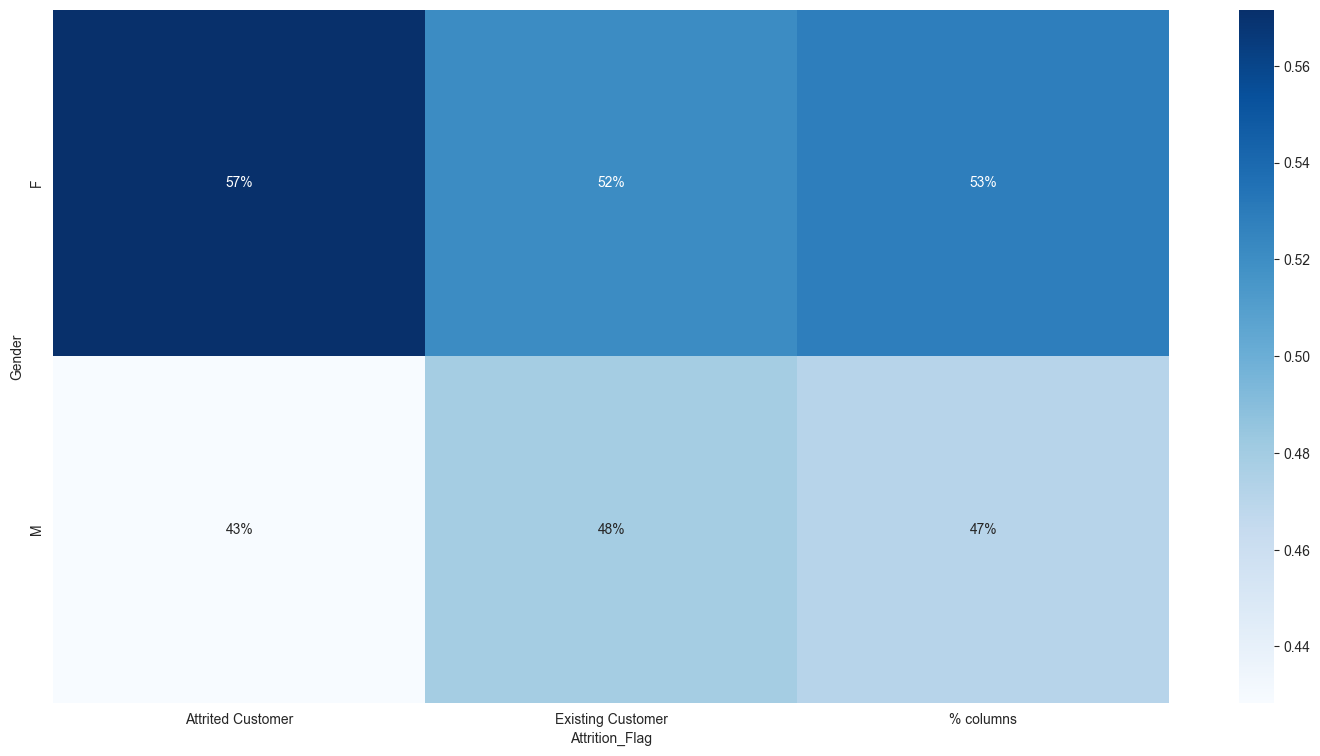

In [6]:
cross = pd.crosstab(churn['Gender'], 
            churn['Attrition_Flag'], 
            margins = True, 
            margins_name = "% columns", 
            normalize='columns')
display(cross)
sns.heatmap(cross, annot=True, fmt='.0%', cmap='Blues')



In [7]:
churn.describe().T

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01

In [8]:
# Count of null values in each column
null_counts = churn.isnull().sum()
print("Count of null values in each column:\n", null_counts)

# Sum of all null values in the DataFrame
total_nulls = churn.isnull().sum().sum()
print("\nTotal number of null values in the DataFrame:", total_nulls)

Count of null values in each column:
 CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Total number of null values in the DataFrame: 0


In [9]:
categorical_columns = churn.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(churn[column].value_counts())
    print("\n")

Value counts for Attrition_Flag:
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


Value counts for Gender:
Gender
F    5358
M    4769
Name: count, dtype: int64


Value counts for Education_Level:
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64


Value counts for Marital_Status:
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64


Value counts for Income_Category:
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64


Value counts for Card_Category:
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64




In [10]:
import pandas as pd
import numpy as np
!pip install openpyxl

# Load the dataset
data = pd.read_csv('BankChurners.csv')

# Drop irrelevant columns
data.drop(columns=['CLIENTNUM', 
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                   'Avg_Open_To_Buy'], inplace=True)

# Encode target and binary features
data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Attrited Customer': 1, 'Existing Customer': 0})
data['Gender'] = data['Gender'].replace({'F': 1, 'M': 0})

# One-hot encode categorical features
categorical_cols = ['Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category']
for col in categorical_cols:
    if 'Unknown' in data[col].unique():
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col).drop(columns='{}_Unknown'.format(col))], axis=1)
    else:
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col)], axis=1)

data.drop(columns=categorical_cols, inplace=True)

# General Stats for Churned Customers
churned_customers = data[data['Attrition_Flag'] == 1]

# Dynamically generate pivot tables and stats for all features
results = {}
for column in data.columns:
    if column == 'Attrition_Flag':
        continue
    
    if data[column].dtype in ['int64', 'float64']:
        # Numerical Feature
        stats = {
            'Mean': churned_customers[column].mean(),
            'Median': churned_customers[column].median(),
            'Std Dev': churned_customers[column].std(),
            'Min': churned_customers[column].min(),
            'Max': churned_customers[column].max()
        }
        results[column] = stats
    else:
        # Categorical Feature
        pivot = churned_customers.pivot_table(
            index=column, 
            values='Attrition_Flag', 
            aggfunc='count'
        )
        results[column] = pivot

# Save Results to Excel
with pd.ExcelWriter('feature_analysis_churn.xlsx') as writer:
    for feature, analysis in results.items():
        if isinstance(analysis, dict):
            pd.DataFrame([analysis]).to_excel(writer, sheet_name=feature)
        else:
            analysis.to_excel(writer, sheet_name=feature)

print("Feature analysis saved to 'feature_analysis_churn.xlsx'.")


C:\Users\Becode-son\AppData\Local\Temp\ipykernel_14828\1190510028.py:15: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\Becode-son\AppData\Local\Temp\ipykernel_14828\1190510028.py:16: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Feature analysis saved to 'feature_analysis_churn.xlsx'.


In [11]:
import pandas as pd

# Overview of Dataset
print("Dataset Overview:")
print(data.info())
print("\nSample Data:")
display(data.head())

# Analyzing Numerical Features
print("\nNumerical Features Analysis:")
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

for feature in numerical_features:
    print(f"\n--- Analysis for {feature} ---")
    print(data[feature].describe())

# Analyzing Categorical Features
categorical_features = data.select_dtypes(include=['object', 'category', 'uint8']).columns

print("\nCategorical Features Analysis:")
for feature in categorical_features:
    print(f"\n--- Pivot Table for {feature} ---")
    if feature == 'Attrition_Flag':
        continue  # Skip the target variable
    try:
        pivot = data.pivot_table(
            values='Attrition_Flag', 
            index=feature, 
            aggfunc='mean'
        )
        print(pivot)
    except Exception as e:
        print(f"Error with {feature}: {e}")

# General Comparison: Churned vs. Non-Churned
print("\nComparison: Churned vs. Non-Churned Customers")
comparison = data.groupby('Attrition_Flag').mean()
print(comparison)

# Summary of Relevant Key Metrics
relevant_metrics = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']
print("\nKey Metrics Summary:")
for metric in relevant_metrics:
    print(f"\n--- Analysis for {metric} ---")
    print(data.groupby('Attrition_Flag')[metric].describe())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Attrition_Flag                  10127 non-null  int64  
 1   Customer_Age                    10127 non-null  int64  
 2   Gender                          10127 non-null  int64  
 3   Dependent_count                 10127 non-null  int64  
 4   Months_on_book                  10127 non-null  int64  
 5   Total_Relationship_Count        10127 non-null  int64  
 6   Months_Inactive_12_mon          10127 non-null  int64  
 7   Contacts_Count_12_mon           10127 non-null  int64  
 8   Credit_Limit                    10127 non-null  float64
 9   Total_Revolving_Bal             10127 non-null  int64  
 10  Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 11  Total_Trans_Amt                 10127 non-null  int64  
 12  Total_Trans_Ct

Attrition_Flag  Customer_Age  Gender  Dependent_count  Months_on_book  \
0               0            45       0                3              39   
1               0            49       1                5              44   
2               0            51       0                3              36   
3               0            40       1                4              34   
4               0            40       0                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  ...  Income_Category_$60K - $80K  \
0       12691.0                  777  ...                         True   
1        8256.0                  864  ...                        False   
2        3418.0                    0  ...                        False   
3        3313.0                 2517  ...                        False   
4        4716.0                    0  ...                         True   

   Income_Category_$80K - $120K  Income_Category_Less than $40K  \
0                         False                           False   
1                         False                            True   
2                          True                           False   
3                         False                            True   
4                         False                           False   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                    False                    True                  False   
1                    False                   False                   True   
2                    False                    True                  False   
3                    False                   False                  False   
4                    False                    True                  False   

   Card_Category_Blue  Card_Category_Gold  Card_Category_Platinum  \
0                True               False                   False   
1                True               False                   False   
2                True               False                   False   
3                True               False                   False   
4                True               False                   False   

   Card_Category_Silver  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  

[5 rows x 33 columns]


Numerical Features Analysis:

--- Analysis for Attrition_Flag ---
count    10127.000000
mean         0.160660
std          0.367235
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Attrition_Flag, dtype: float64

--- Analysis for Customer_Age ---
count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

--- Analysis for Gender ---
count    10127.000000
mean         0.529081
std          0.499178
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Gender, dtype: float64

--- Analysis for Dependent_count ---
count    10127.000000
mean         2.346203
std          1.298908
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Dependent_count, dty

Accuracy: 0.88
Precision: 0.57
Recall: 0.97
F1 Score: 0.72


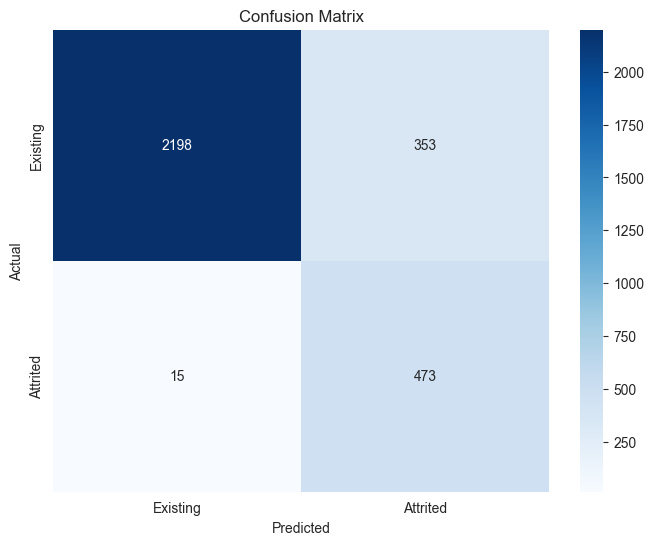

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      2551
           1       0.57      0.97      0.72       488

    accuracy                           0.88      3039
   macro avg       0.78      0.92      0.82      3039
weighted avg       0.93      0.88      0.89      3039



In [12]:
# Step 1: Imports

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Prepare the Data
# Separate features (X) and target (y)
X = churn.drop(columns=['Attrition_Flag'])
y = churn['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 4: Address Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 5: Train the RandomForestClassifier with Class Weights
rf_model = RandomForestClassifier(n_estimators=100, 
                                  max_depth=10, 
                                  class_weight='balanced', 
                                  random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Step 6: Predictions and Adjusted Threshold
# Predict probabilities
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Adjust the decision threshold for improved Recall
threshold = 0.3
y_pred_thresh = (y_proba >= threshold).astype(int)

# Step 7: Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_thresh)
precision = precision_score(y_test, y_pred_thresh)
recall = recall_score(y_test, y_pred_thresh)
f1 = f1_score(y_test, y_pred_thresh)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_thresh)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Existing', 'Attrited'], yticklabels=['Existing', 'Attrited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_thresh))


Accuracy: 0.95
Precision: 0.78
Recall: 0.94
F1 Score: 0.85


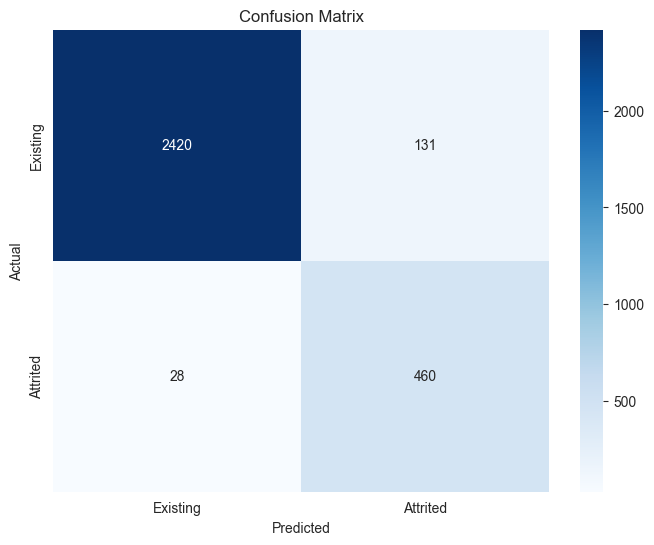

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      2551
           1       0.78      0.94      0.85       488

    accuracy                           0.95      3039
   macro avg       0.88      0.95      0.91      3039
weighted avg       0.95      0.95      0.95      3039



In [13]:
from xgboost import XGBClassifier

# Separate features and target
X = churn.drop(columns=['Attrition_Flag'])
y = churn['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 4: Handle Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 5: Train the XGBoostClassifier
xgb_model = XGBClassifier(
    scale_pos_weight=6,  # Adjusts for imbalance (weight = majority / minority)
    n_estimators=200,    # Number of boosting rounds
    max_depth=5,         # Limits tree depth for regularization
    learning_rate=0.1,   # Learning rate for boosting
    random_state=42
)

xgb_model.fit(X_train_res, y_train_res)

# Step 6: Predict and Adjust Threshold
y_proba = xgb_model.predict_proba(X_test)[:, 1]  # Predict probabilities
threshold = 0.4  # Adjust threshold for better Recall
y_pred_thresh = (y_proba >= threshold).astype(int)

# Step 7: Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_thresh)
precision = precision_score(y_test, y_pred_thresh)
recall = recall_score(y_test, y_pred_thresh)
f1 = f1_score(y_test, y_pred_thresh)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_thresh)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Existing', 'Attrited'], yticklabels=['Existing', 'Attrited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_thresh))


In [14]:
import sklearn
import imblearn
print("Scikit-learn version:", sklearn.__version__)
print("Imbalanced-learn version:", imblearn.__version__)

Scikit-learn version: 1.5.2
Imbalanced-learn version: 0.12.4


In [15]:
# Check the class distributions before and after SMOTE
print("Original Train Set Class Distribution:")
print(y_train.value_counts(normalize=True))

print("\nAfter SMOTE Resampling (Train Set):")
print(pd.Series(y_train_res).value_counts(normalize=True))

print("\nTest Set Class Distribution:")
print(y_test.value_counts(normalize=True))


Original Train Set Class Distribution:
Attrition_Flag
0    0.839306
1    0.160694
Name: proportion, dtype: float64

After SMOTE Resampling (Train Set):
Attrition_Flag
0    0.5
1    0.5
Name: proportion, dtype: float64

Test Set Class Distribution:
Attrition_Flag
0    0.839421
1    0.160579
Name: proportion, dtype: float64


##Addressing multicollineairty


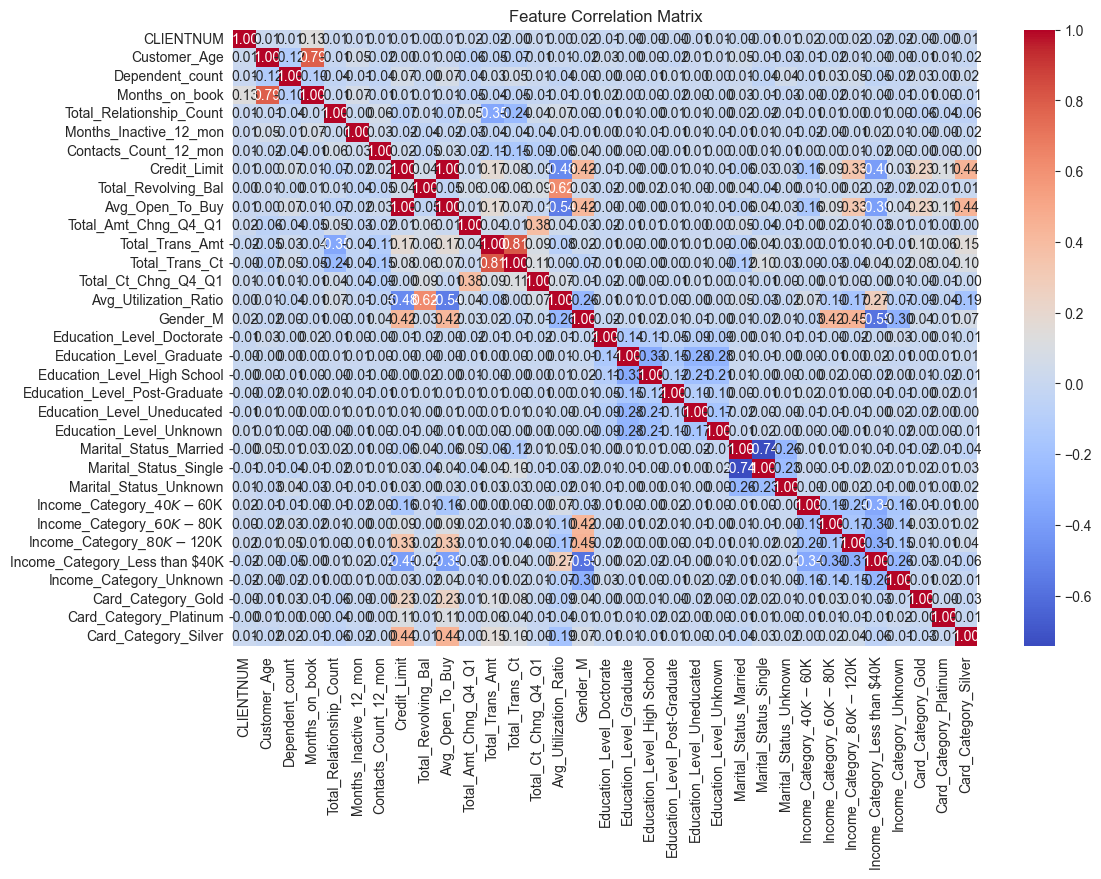

In [16]:
corr_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


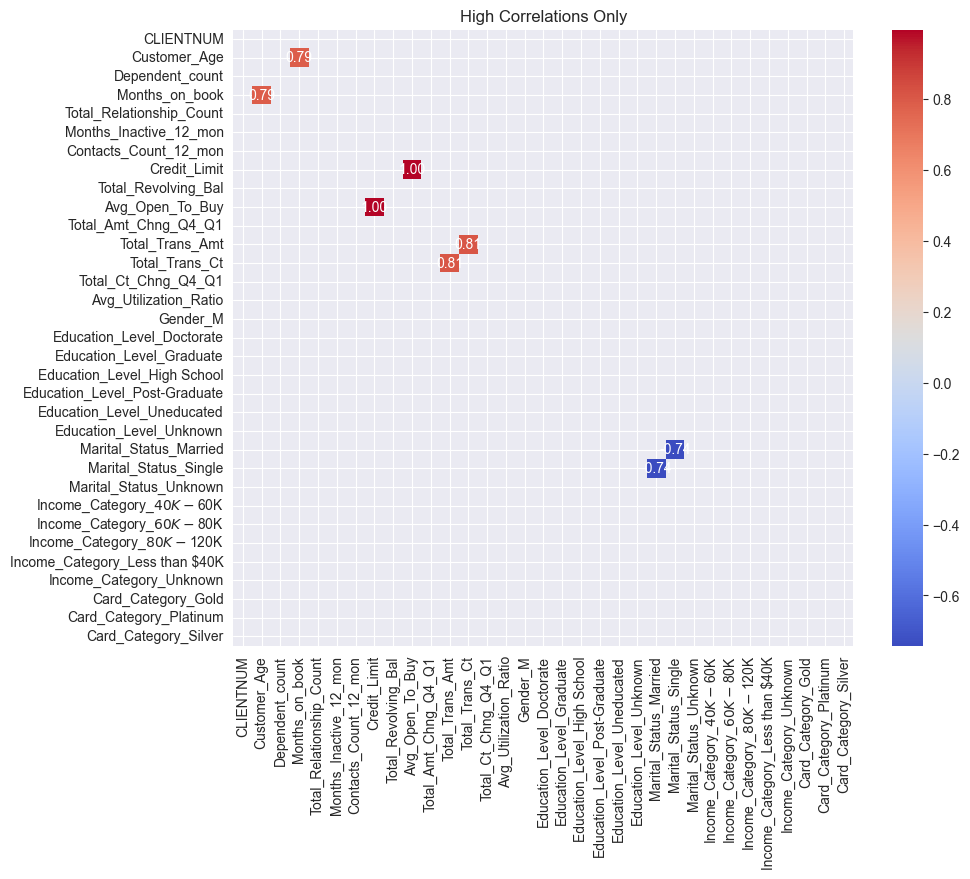

In [17]:
import numpy as np

# Compute the correlation matrix
corr_matrix = X.corr()

# Filter for high correlations (absolute value > 0.7)
high_corr = corr_matrix[(np.abs(corr_matrix) > 0.7) & (corr_matrix != 1.0)]

plt.figure(figsize=(10, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', fmt=".2f", mask=high_corr.isnull())
plt.title("High Correlations Only")
plt.show()


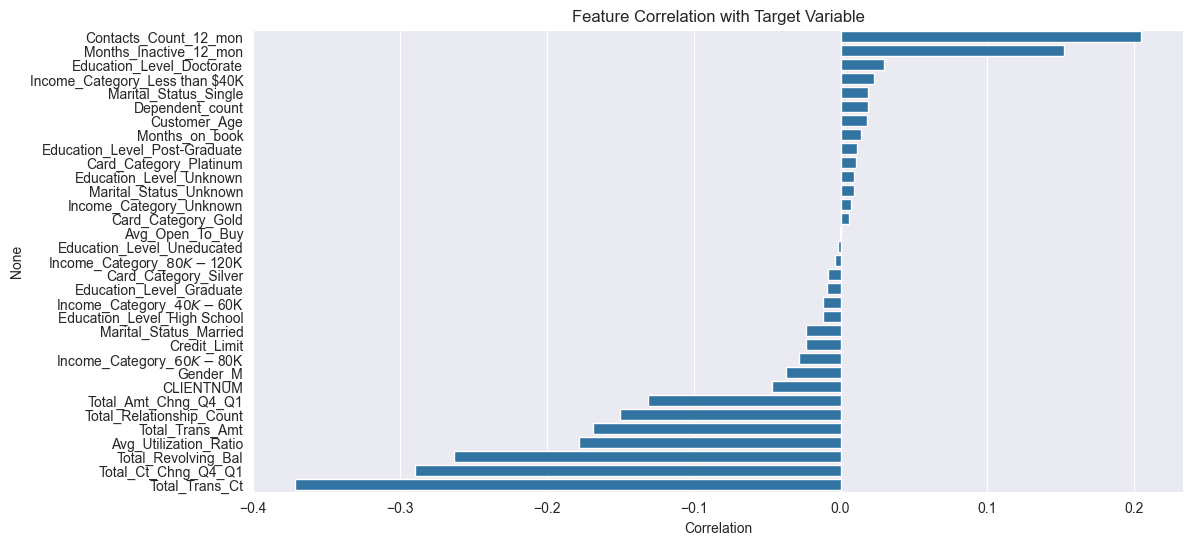

In [18]:
target_corr = X.corrwith(y)  # Correlation with target variable
target_corr = target_corr.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title("Feature Correlation with Target Variable")
plt.xlabel("Correlation")
plt.show()


Key Observations:

    Negative Correlations:
        Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Total_Revolving_Bal are negatively correlated with churn.
            Fewer transactions, low balance changes, or fewer interactions might indicate churn.
    Positive Correlations:
        Contacts_Count_12_mon and Months_Inactive_12_mon are positively correlated with churn.
            Customers with fewer contacts and more inactive months are more likely to churn.
    Low Correlation: Most features have weak correlations (close to 0)

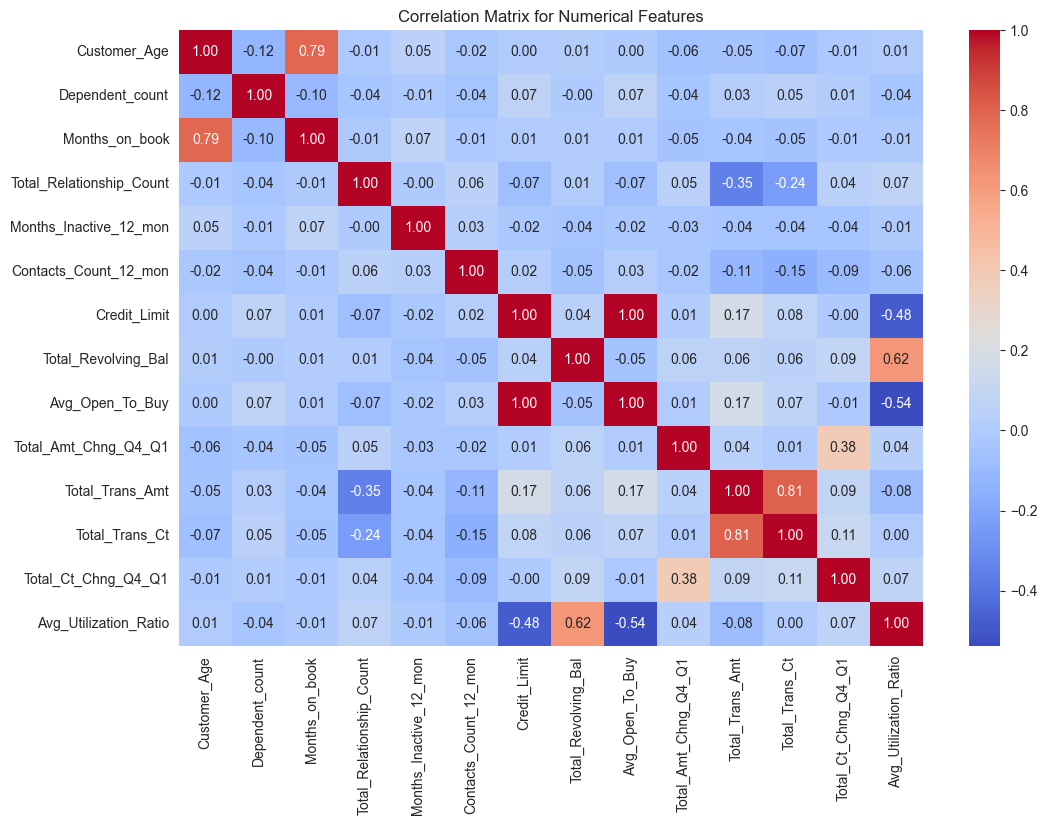

In [19]:
numerical_features = X.select_dtypes(include=['float64', 'int64'])
corr_matrix_num = numerical_features.corr()

corr_matrix_num = corr_matrix_num.drop('CLIENTNUM', axis=1).drop('CLIENTNUM', axis=0)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_num, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()


In [20]:
X['Credit_Utilization'] = X['Total_Revolving_Bal'] / X['Credit_Limit']

In [21]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('BankChurners.csv')

# Drop irrelevant columns
data.drop(columns=['CLIENTNUM', 
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                   'Avg_Open_To_Buy'], inplace=True)

# Encode target and binary features
data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Attrited Customer': 1, 'Existing Customer': 0})
data['Gender'] = data['Gender'].replace({'F': 1, 'M': 0})

# One-hot encode categorical features
categorical_cols = ['Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category']
for col in categorical_cols:
    if 'Unknown' in data[col].unique():
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col).drop(columns='{}_Unknown'.format(col))], axis=1)
    else:
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col)], axis=1)

data.drop(columns=categorical_cols, inplace=True)

# General Stats for Churned Customers
churned_customers = data[data['Attrition_Flag'] == 1]

# Dynamically generate pivot tables and stats for all features
results = {}
for column in data.columns:
    if column == 'Attrition_Flag':
        continue
    
    if data[column].dtype in ['int64', 'float64']:
        # Numerical Feature
        stats = {
            'Mean': churned_customers[column].mean(),
            'Median': churned_customers[column].median(),
            'Std Dev': churned_customers[column].std(),
            'Min': churned_customers[column].min(),
            'Max': churned_customers[column].max()
        }
        results[column] = stats
    else:
        # Categorical Feature
        pivot = churned_customers.pivot_table(
            index=column, 
            values='Attrition_Flag', 
            aggfunc='count'
        )
        results[column] = pivot

# Save Results to Excel
with pd.ExcelWriter('feature_analysis_churn.xlsx') as writer:
    for feature, analysis in results.items():
        if isinstance(analysis, dict):
            pd.DataFrame([analysis]).to_excel(writer, sheet_name=feature)
        else:
            analysis.to_excel(writer, sheet_name=feature)

print("Feature analysis saved to 'feature_analysis_churn.xlsx'.")


C:\Users\Becode-son\AppData\Local\Temp\ipykernel_14828\1511237455.py:14: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\Becode-son\AppData\Local\Temp\ipykernel_14828\1511237455.py:15: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Feature analysis saved to 'feature_analysis_churn.xlsx'.


Accuracy: 0.68
Precision: 0.28
Recall: 0.64
F1 Score: 0.39


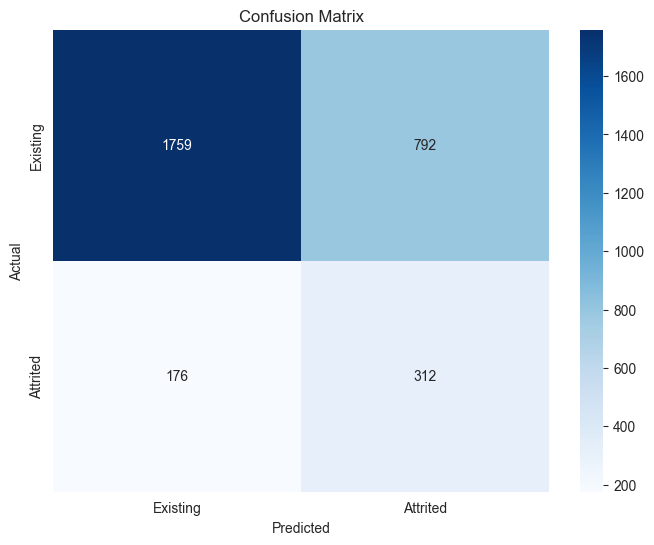

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.69      0.78      2551
           1       0.28      0.64      0.39       488

    accuracy                           0.68      3039
   macro avg       0.60      0.66      0.59      3039
weighted avg       0.81      0.68      0.72      3039



In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns

import matplotlib.pyplot as plt

# Separate features and target
X = churn.drop(columns=['Attrition_Flag'])
y = churn['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg_model.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred = log_reg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Existing', 'Attrited'], yticklabels=['Existing', 'Attrited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))